100%|██████████| 170M/170M [00:02<00:00, 80.8MB/s]


클래스 라벨:  car truck deer truck deer deer plane dog


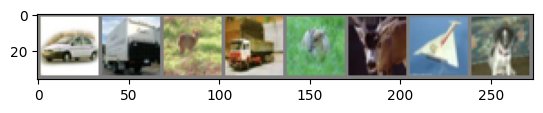

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

# 데이터 변환 (Normalization + Tensor 변환)
transform = transforms.Compose([
    transforms.ToTensor(), # 이미지를 Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 정규화
])

# CIFAR-10 데이터셋 로드
train_dataset = datasets.CIFAR10(
    root='./data',  # 데이터 저장 경로
    train=True,     # 학습 데이터 여부
    download=True,  # 데이터 자동 다운로드
    transform=transform
)

# DataLoader 생성
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=8, # 배치 크기
    shuffle=True, # 데이터를 랜덤하게 섞음
    num_workers=0 # 데이터를 병렬로 로드  (Windows에서는 2->0으로 설정)
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # 정규화 해제
    np_img = img.numpy() # Tensor를 numpy 배열로 변환
    plt.imshow(np.transpose(np_img, (1, 2, 0))) # 채널 순서 변경 (C, H, W -> H, W, C)
    plt.show()

    # 데이터 로더에서 배치 가져오기
data_iter = iter(train_loader)
images, labels = next(data_iter)

print('클래스 라벨: ', ' '.join(f'{classes[labels[j]]}' for j in range(8)))
imshow(torchvision.utils.make_grid(images)) # 이미지 배치 출력